In [32]:
import sys
import os
import glob
sys.path.append(os.path.abspath('../../Code/Software/CarDpy-master'))
from cardpy.Sample_Data.Data_Paths import *
from cardpy.Data_Import            import *
from cardpy.Data_Sorting           import *
from cardpy.Data_Processing.DTI    import *
from cardpy.GUI_Tools              import IntERCOMS
from cardpy.Colormaps              import *
from cardpy.Data_Saving            import *
from cardpy.Data_Processing.cDTI   import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import nrrd

from dipy.denoise.localpca import mppca
from   dipy.core.gradients             import gradient_table                                                                    # Import gradient table from DiPy
from   dipy.denoise.patch2self         import patch2self                                                                        # Import patch to self-denoising from DiPy
from   dipy.denoise.noise_estimate     import estimate_sigma                                                                    # Import non-local means denoising sigma estimate from DiPy
from   dipy.denoise.nlmeans            import nlmeans                                                                           # Import non-local means denoising from DiPy
from   dipy.core.gradients             import gradient_table                                                                    # Import gradient table from DiPy
from   dipy.denoise.pca_noise_estimate import pca_noise_estimate                                                                # Import local PCA denoising noise estimate from DiPy
from dipy.denoise.localpca import localpca
from dipy.denoise.pca_noise_estimate import pca_noise_estimate
cDTI_cmaps     = cDTI_Colormaps_Generator()

In [33]:
def create_center_mask(image_shape, frac_x=0.5, frac_y = 0.8):
    """
    Create a centered 3D mask with a box occupying `size_fraction` of each dimension.

    Parameters:
    - image_shape: shape of the 3D image (x, y, z)
    - size_fraction: fraction (0 < f <= 1) of the image each side of the box spans

    Returns:
    - mask: a 3D numpy array of same shape with 1s in the center box, 0 elsewhere
    """
    x, y = image_shape
    cx, cy = x // 2, y // 2
    hx = int((x * frac_x) / 2)
    hy = int((y * frac_y) / 2)

    x_start, x_end = max(cx - hx, 0), min(cx + hx, x)
    y_start, y_end = max(cy - hy, 0), min(cy + hy, y)

    # Create 2D mask
    mask2d = np.zeros((x, y), dtype=np.uint8)
    mask2d[x_start:x_end, y_start:y_end] = 1

    # Broadcast to 3D
    return mask2d

vol_2.0res_2.0sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_2.0sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_2.0sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_2.0sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_2.0sl/00_Original/Original.bvecs
(96, 96, 1, 1, 15)


/var/folders/mb/68q17fnn0sbfmdht6h_p8mlw0000gn/T/ipykernel_2514/3871108437.py:96: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)
/var/folders/mb/68q17fnn0sbfmdht6h_p8mlw0000gn/T/ipykernel_2514/3871108437.py:110: RuntimeWarning: invalid value encountered in divide
  snr = signal_mean/ signal_std * binary_mask


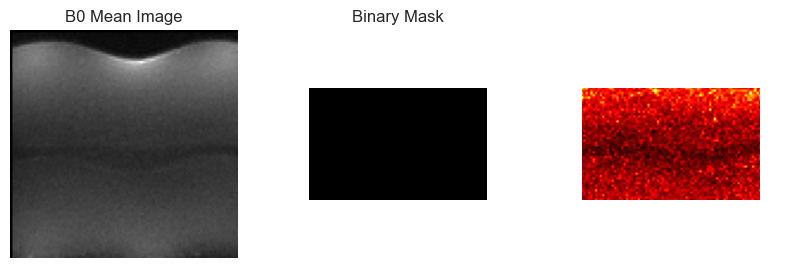

vol_2.0res_3.0sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_3.0sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_3.0sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_3.0sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_3.0sl/00_Original/Original.bvecs
(96, 96, 1, 1, 15)


/var/folders/mb/68q17fnn0sbfmdht6h_p8mlw0000gn/T/ipykernel_2514/3871108437.py:123: RuntimeWarning: Mean of empty slice
  snr_mean_all.append(np.nanmean(snr[center_x-10:center_x+10, center_y-10:center_y+10]))


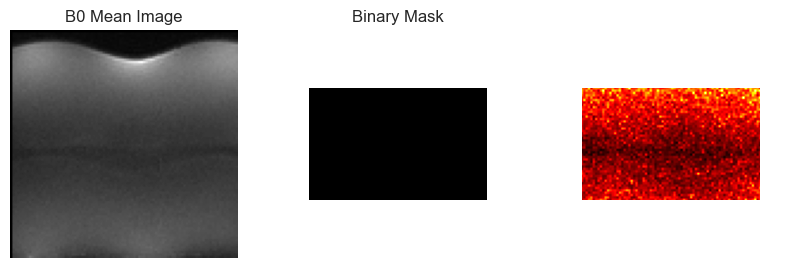

vol_2.0res_5.0sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_5.0sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_5.0sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_5.0sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_5.0sl/00_Original/Original.bvecs
(96, 96, 1, 1, 15)


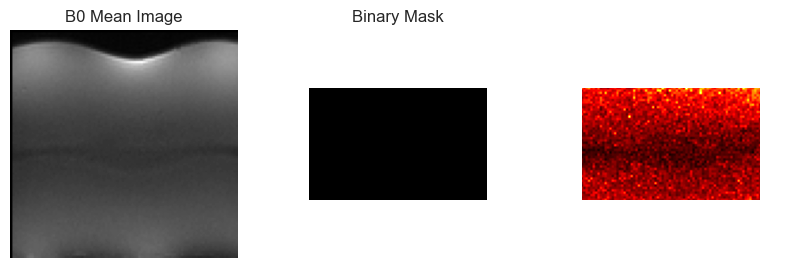

vol_2.0res_8.0sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_8.0sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_8.0sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_8.0sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_8.0sl/00_Original/Original.bvecs
(96, 96, 1, 1, 15)


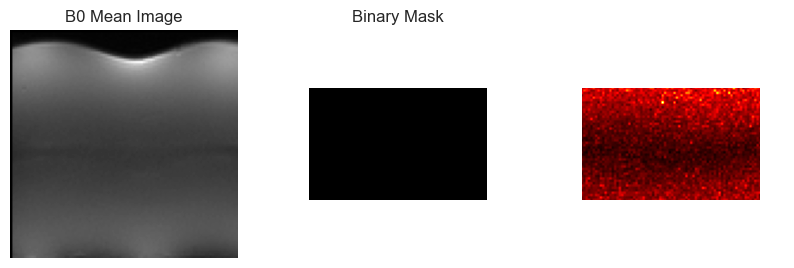

vol_2.0res_10.0sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_10.0sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_10.0sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_10.0sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.0res_10.0sl/00_Original/Original.bvecs
(96, 96, 1, 1, 15)


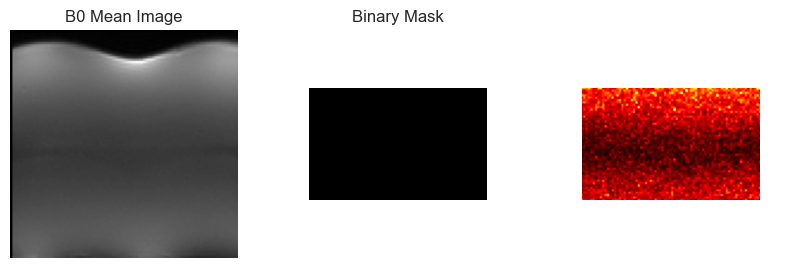

vol_2.5res_2.0sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_2.0sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_2.0sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_2.0sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_2.0sl/00_Original/Original.bvecs
(76, 76, 1, 1, 15)


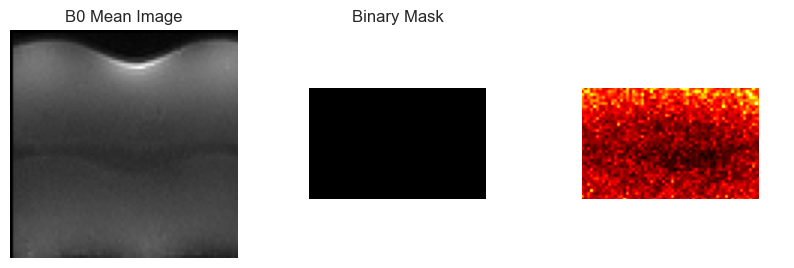

vol_2.5res_3.0sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_3.0sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_3.0sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_3.0sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_3.0sl/00_Original/Original.bvecs
(76, 76, 1, 1, 15)


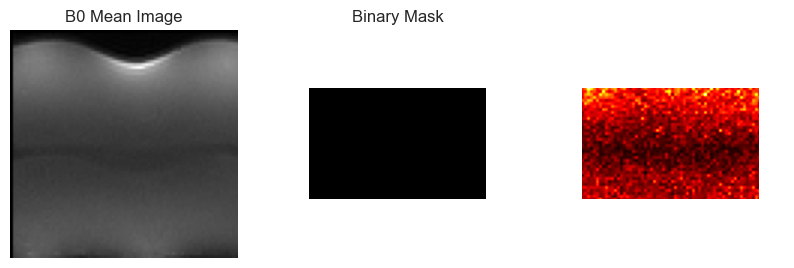

vol_2.5res_5.0sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_5.0sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_5.0sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_5.0sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_5.0sl/00_Original/Original.bvecs
(76, 76, 1, 1, 15)


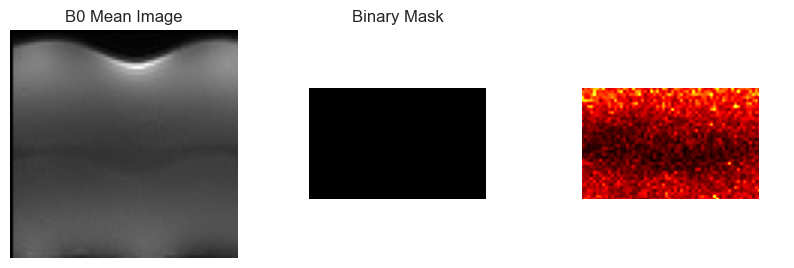

vol_2.5res_8.0sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_8.0sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_8.0sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_8.0sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_8.0sl/00_Original/Original.bvecs
(76, 76, 1, 1, 15)


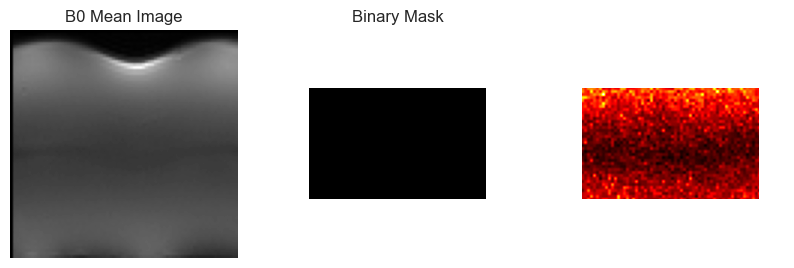

vol_2.5res_10.0sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_10.0sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_10.0sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_10.0sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_2.5res_10.0sl/00_Original/Original.bvecs
(76, 76, 1, 1, 15)


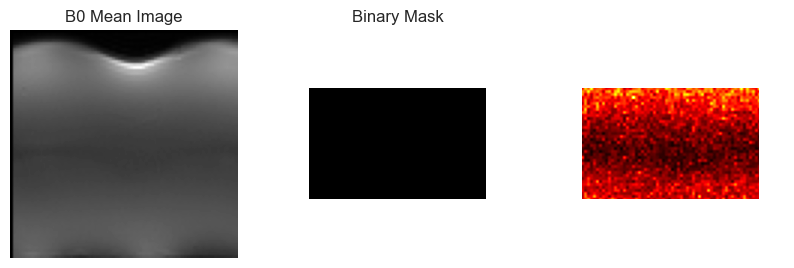

vol_3.0res_2.0sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_2.0sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_2.0sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_2.0sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_2.0sl/00_Original/Original.bvecs
(64, 64, 1, 1, 15)


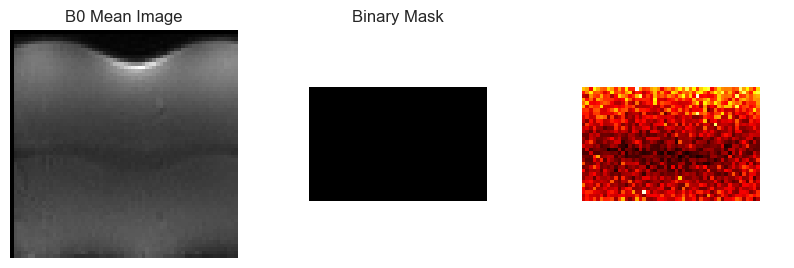

vol_3.0res_3.5sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_3.5sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_3.5sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_3.5sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_3.5sl/00_Original/Original.bvecs
(64, 64, 1, 1, 15)


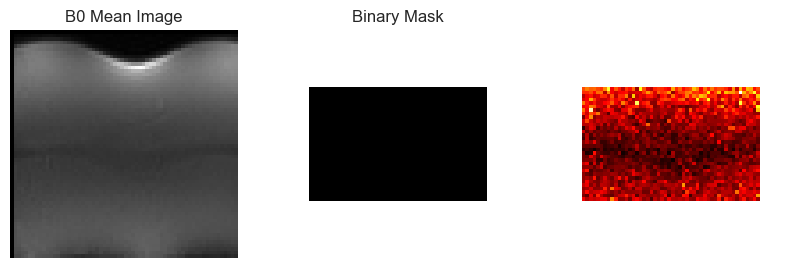

vol_3.0res_5.5sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_5.5sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_5.5sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_5.5sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_5.5sl/00_Original/Original.bvecs
(64, 64, 1, 1, 15)


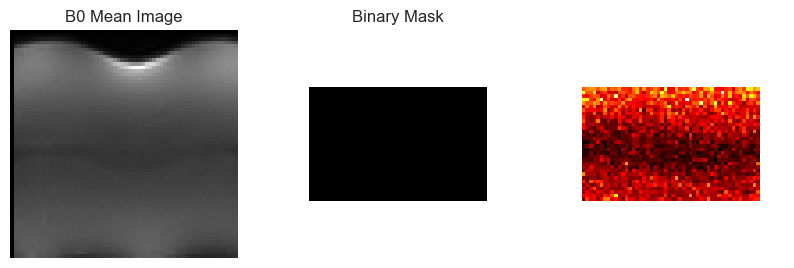

vol_3.0res_8.0sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_8.0sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_8.0sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_8.0sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_8.0sl/00_Original/Original.bvecs
(64, 64, 1, 1, 15)


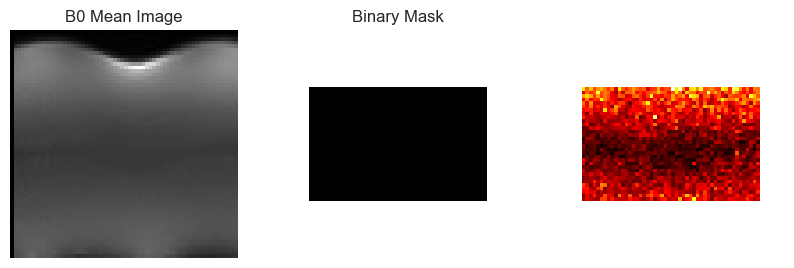

vol_3.0res_10.0sl
/Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_10.0sl/00_Original/Original.nii /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_10.0sl/00_Original/Original.header /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_10.0sl/00_Original/Original.bvals /Volumes/T7/Voxel_Bank/phantom_2/NifTi/vol_3.0res_10.0sl/00_Original/Original.bvecs
(64, 64, 1, 1, 15)


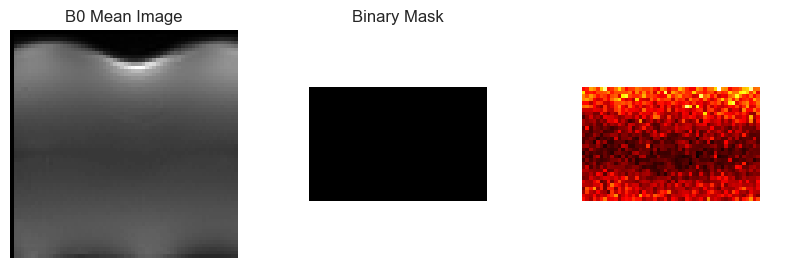

In [34]:
import scipy.ndimage as ndi
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects, binary_closing, ball

#all_resolutions = ['vol_2.0res_2.0sl','vol_2.0res_3.0sl','vol_2.0res_4.0sl','vol_2.0res_5.0sl','vol_2.0res_6.0sl','vol_2.0res_8.0sl','vol_2.0res_10.0sl',
#                   'vol_2.5res_3.0sl','vol_2.5res_5.0sl']
#volume = [2*2*2,2*2*3,2*2*4,2*2*5,2*2*6,2*2*8,2*2*10, 2.5*2.5*3,2.5*2.5*5] # in mm^3

all_resolutions = ['vol_2.0res_2.0sl',
                   'vol_2.0res_3.0sl',
                   'vol_2.0res_5.0sl',
                   'vol_2.0res_8.0sl',
                   'vol_2.0res_10.0sl',
                   'vol_2.5res_2.0sl',
                   'vol_2.5res_3.0sl',
                   'vol_2.5res_5.0sl',
                   'vol_2.5res_8.0sl',
                   'vol_2.5res_10.0sl',
                   'vol_3.0res_2.0sl',
                   'vol_3.0res_3.5sl',
                    'vol_3.0res_5.5sl',
                    'vol_3.0res_8.0sl',
                    'vol_3.0res_10.0sl',
                   
                   ]

volume = [2*2*2, 2*2*3, 2*2*5, 2*2*8, 2*2*10,
          2.5*2.5*2, 2.5*2.5*3, 2.5*2.5*5, 2.5*2.5*8, 2.5*2.5*10,
          3*3*2, 3*3*3.5, 3*3*5.5, 3*3*8, 3*3*10]

res = '/vol_2.0res_3.0sl'
folder = '00_Original' #'01_Unrung'

snr_all = []
snr_mean_all = []
b0_all = []
mask_all = []
signal_std_all = []
signal_all = []

std_corr = []
signal_corr = []
snr_corr = []
sigma_all = []

for res in all_resolutions:
    print(res)
    main_path                = os.path.abspath('../../phantom_2/NifTi/'+res+'/' + folder)
    
    NifTi_path               = glob.glob(os.path.join(main_path,  '*.nii'))[0]
    header_path              = glob.glob(os.path.join(main_path,  '*.header'))[0]
    b_values_path            = glob.glob(os.path.join(main_path,  '*.bvals'))[0]
    b_vectors_path           = glob.glob(os.path.join(main_path,  '*.bvecs'))[0]
    print(NifTi_path, header_path, b_values_path, b_vectors_path)
    #Segmentation_Path        = os.path.join(os.path.abspath('../../Phantom/Segmentations'+res),'Interpolated_mask.mat')
    #if os.path.isdir(Segmentation_Path) == False:
    #    os.makedirs(Segmentation_Path)
    Quantiative_Results_Path = os.path.join(os.path.abspath('../../Phantom/DTI_Maps'+res+'/' + folder))
    if os.path.isdir(Quantiative_Results_Path) == False:
        os.makedirs(Quantiative_Results_Path)

    [matrix_stacked, b_vals_stacked, b_vecs_stacked, Header, _, _] = NifTi_Reader(NifTi_path, b_values_path, b_vectors_path, header_path)
    [matrix_sorted,  b_vals_sorted,  b_vecs_sorted]                = stacked2sorted(matrix_stacked, b_vals_stacked, b_vecs_stacked)
    print(matrix_sorted.shape)
    #[_, _, Eigenvectors, Standard_DTI_Metrics]                     = DTI_recon(np.nanmean(matrix_sorted,axis = -1)[...,np.newaxis], b_vals_sorted, b_vecs_sorted, tensor_fit = 'NLLS')
    #[Endo_Centers, Endo_Axes, Epi_Centers, Epi_Axes]               = IntERCOMS.IntERCOMS_GUI(matrix_sorted[:, :, :, 0], Standard_DTI_Metrics['MD'], Eigenvectors['E1'], Line_Width = 1)
    #[myocardium_mask, NRRD2, NRRD1]                                = IntERCOMS.IntERCOMS_Mask_Making(matrix_sorted, Endo_Centers, Endo_Axes, Epi_Centers, Epi_Axes)
    #Save_NRRD_Segmentation(NRRD1, Header, Segmentaiton_Path, 'LV_Blood_Pool')
    #Save_NRRD_Segmentation(NRRD2, Header, Segmentaiton_Path, 'LV_Myocardium+Blood_Pool')

    # MAke a mask for just center 20 x 20 voxel region 
    center_mask = np.zeros_like(matrix_sorted[..., 0])
    center_x = matrix_sorted.shape[0] #// 2
    center_y = matrix_sorted.shape[1] #// 2
    center_mask[:, :, :] = 1

    center_mask = center_mask.astype(float)
    center_mask[center_mask == 0] = np.nan  # Set non-center voxels to NaN

    b0 = np.squeeze(matrix_sorted[:,:,0,0,:])
    signal_mean = np.nanmean(b0,axis = -1)
    signal_std = np.nanstd(b0,axis = -1)


    # Step 1: Average the b=0 images
    b0 = np.squeeze(matrix_sorted[:, :, :, 0, :])  # shape: (x, y, z, b0s)
    b0_mean = np.mean(b0, axis=-1)

    # Step 2: Threshold the b=0 mean image
    thresh = threshold_otsu(b0_mean, nbins = 100)
    binary_mask =  create_center_mask(b0_mean.shape, frac_x=0.5, frac_y=0.8) #b0_mean > thresh
    binary_mask = binary_mask.astype(float)
    binary_mask[binary_mask == 0] = np.nan  # Set non-thresholded voxels to NaN)

    plt.subplots(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(b0_mean, cmap='gray')
    plt.title('B0 Mean Image')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Binary Mask')
    plt.axis('off')
    
    # Step 4: Mask SNR computation
    signal_mean = np.mean(b0, axis=-1)
    signal_std = np.std(b0, axis=-1)
    
    snr = np.zeros_like(signal_mean)
    snr = signal_mean/ signal_std * binary_mask
    plt.subplot(1, 3, 3)
    plt.axis('off')
    plt.imshow(snr, cmap='hot')
    plt.show()
    #snr = signal_mean / signal_std * center_mask[:,:,0,0]

    snr_all.append(snr)
    b0_all.append(b0)
    mask_all.append(center_mask)
    signal_std_all.append(signal_std[center_x-10:center_x+10, center_y-10:center_y+10])
    signal_all.append(signal_mean[center_x-10:center_x+10, center_y-10:center_y+10])
    
    snr_mean_all.append(np.nanmean(snr[center_x-10:center_x+10, center_y-10:center_y+10]))
    
    gtab= gradient_table(b_vals_stacked, b_vecs_stacked)
    
    sigma  = pca_noise_estimate(np.repeat(matrix_stacked,5,axis = 2), gtab, correct_bias = True, smooth = 5) 
    #denoised_arr = localpca(matrix_stacked, sigma, tau_factor=2.3, patch_radius=2)
    sigma_all.append(sigma[center_x-10:center_x+10, center_y-10:center_y+10,2])

    #

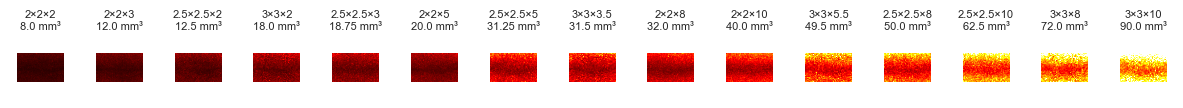

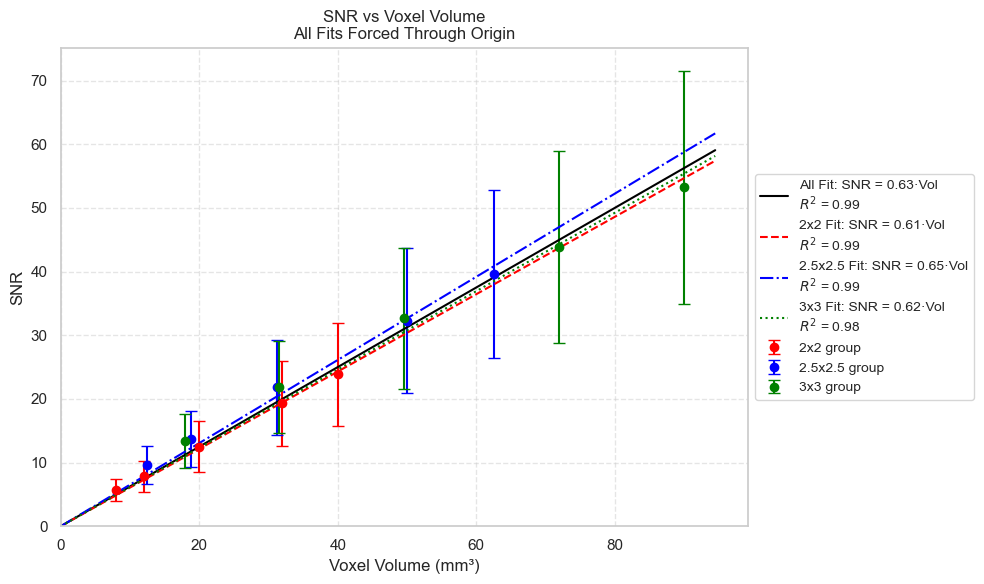

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import seaborn as sns

# --------------------- Data Setup ---------------------
# Define voxel volumes (mm³) and group tags
volume = np.array([
    2*2*2, 2*2*3, 2*2*5, 2*2*8, 2*2*10,
    2.5*2.5*2, 2.5*2.5*3, 2.5*2.5*5, 2.5*2.5*8, 2.5*2.5*10,
    3*3*2, 3*3*3.5, 3*3*5.5, 3*3*8, 3*3*10
])
res_labels = [
    '2×2×2', '2×2×3', '2×2×5', '2×2×8', '2×2×10',
    '2.5×2.5×2', '2.5×2.5×3', '2.5×2.5×5', '2.5×2.5×8', '2.5×2.5×10',
    '3×3×2', '3×3×3.5', '3×3×5.5', '3×3×8', '3×3×10'
]
group_id = ['2x2'] * 5 + ['2.5x2.5'] * 5 + ['3x3'] * 5

# Assume snr_all is a list of 2D heatmaps (same order as volume)
# snr_all = [...]  # You should define this list in your session

# --------------------- Compute SNR Stats ---------------------
snr_means = [np.nanmean(snr) for snr in snr_all]
snr_stds  = [np.nanstd(snr) for snr in snr_all]

# Create and sort DataFrame including snr maps
snr_df = pd.DataFrame({
    'Volume': volume,
    'SNR': snr_means,
    'SNR_std': snr_stds,
    'Resolution': res_labels,
    'Group': group_id,
    'SNR_map': snr_all
})
snr_df = snr_df.sort_values(by='Volume').reset_index(drop=True)
phantom_df = snr_df.copy()
# Save Phantom DF
phantom_df.to_csv('phantom_snr.csv', index=False)

# --------------------- Heatmaps ---------------------
fig, axes = plt.subplots(1, len(snr_df), figsize=(12, 6), dpi=100)
for i, row in snr_df.iterrows():
    axes[i].imshow(row['SNR_map'], cmap='hot', vmin=0, vmax=70)
    axes[i].set_title(f"{row['Resolution']}\n{row['Volume']} mm³", fontsize=8)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# --------------------- Regression Plot ---------------------
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Use consistent group colors
group_palette = {
    '2x2': 'red',
    '2.5x2.5': 'blue',
    '3x3': 'green'
}

# Scatter plot with group colors
for group in snr_df['Group'].unique():
    group_data = snr_df[snr_df['Group'] == group]
    plt.errorbar(
        group_data['Volume'], group_data['SNR'],
        yerr=group_data['SNR_std'],
        fmt='o', label=f'{group} group',
        color=group_palette[group], capsize=4
    )

# --------------------- Fit Helper ---------------------
def fit_through_origin(x, y):
    A = x[:, np.newaxis]
    k, *_ = np.linalg.lstsq(A, y, rcond=None)
    y_pred = k[0] * x
    r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)
    return k[0], r2

x_fit = np.linspace(0, snr_df['Volume'].max() * 1.05, 100)

# Fit 1: All data
k_all, r2_all = fit_through_origin(snr_df['Volume'].values, snr_df['SNR'].values)
plt.plot(x_fit, k_all * x_fit, '-', color='black', label=f'All Fit: SNR = {k_all:.2f}·Vol\n$R^2$ = {r2_all:.2f}')

# Fit by group
for group, style in zip(['2x2', '2.5x2.5', '3x3'], ['--', '-.', ':']):
    df_group = snr_df[snr_df['Group'] == group]
    k, r2 = fit_through_origin(df_group['Volume'].values, df_group['SNR'].values)
    plt.plot(x_fit, k * x_fit, style, color=group_palette[group],
             label=f'{group} Fit: SNR = {k:.2f}·Vol\n$R^2$ = {r2:.2f}')

# --------------------- Final Plot Setup ---------------------
plt.title('SNR vs Voxel Volume\nAll Fits Forced Through Origin')
plt.xlabel('Voxel Volume (mm³)')
plt.ylabel('SNR')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid(True, linestyle='--', alpha=0.5)

# Legend outside
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=10)
plt.tight_layout()
plt.show()

In [36]:
snr_df

,Volume,SNR,SNR_std,Resolution,Group,SNR_map
0,8.00,5.683973,1.677743,2×2×2,2x2,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
1,12.00,7.864690,2.456463,2×2×3,2x2,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
2,12.50,9.643312,3.021021,2.5×2.5×2,2.5x2.5,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
3,18.00,13.410921,4.260233,3×3×2,3x3,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
4,18.75,13.728209,4.357347,2.5×2.5×3,2.5x2.5,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
5,20.00,12.526924,3.929127,2×2×5,2x2,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
6,31.25,21.805498,7.401680,2.5×2.5×5,2.5x2.5,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
7,31.50,21.866477,7.164830,3×3×3.5,3x3,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
8,32.00,19.289563,6.659057,2×2×8,2x2,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
9,40.00,23.899844,8.105319,2×2×10,2x2,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."


# In Vivo

In [39]:
# load in volutneer data 
vox_folder = ['vol_2.0res_3.0sl','vol_2.0res_5.0sl','vol_2.0res_8.0sl',
            'vol_2.5res_3.0sl','vol_2.5res_5.0sl','vol_2.5res_8.0sl',
            'vol_3.0res_3.5sl','vol_3.0res_5.5sl','vol_3.0res_8.0sl']
            
vol_idx = ['V001','V002','V003','V004','V005','V006','V007','V008','V009','V010', 'V011']
volumes = [2*2*3,2*2*5,2*2*8,2.5*2.5*3,2.5*2.5*5,2.5*2.5*8,3*3*3.5,3*3*5.5,3*3*8]

In [40]:
import os, glob
import numpy as np
import pandas as pd
from scipy.io import loadmat
from dipy.core.gradients import gradient_table

# === Your NIfTI reader and sorter functions must be defined ===
# Example: from your_module import NifTi_Reader, stacked2sorted

# Configuration
vox_folder = [
    'vol_2.0res_3.0sl', 'vol_2.0res_5.0sl', 'vol_2.0res_8.0sl',
    'vol_2.5res_3.0sl', 'vol_2.5res_5.0sl', 'vol_2.5res_8.0sl',
    'vol_3.0res_3.5sl', 'vol_3.0res_5.5sl', 'vol_3.0res_8.0sl'
]

volumes = [2*2*3, 2*2*5, 2*2*8, 2.5*2.5*3, 2.5*2.5*5, 2.5*2.5*8, 3*3*3.5, 3*3*5.5, 3*3*8]
vol_idx = ['V001','V002','V003','V004','V005','V006','V007','V008','V009','V010','V011']
tot_volunteers = len(vol_idx)

# Containers
df = pd.DataFrame({})
median = pd.DataFrame({})
snr_all, snr_all_v2, sigma_all, b0_all, mask_all = [], [], [], [], []
cvolumes = []

b0_all = []

for vv in range(tot_volunteers):
    for ii in range(9):
        main_path = os.path.abspath(f'../../Data/NifTi/{vol_idx[vv]}/{vox_folder[ii]}/ADC_Filtered')
        path_segmentation = os.path.abspath(f'../../Data/Segmentations/{vol_idx[vv]}/{vox_folder[ii]}')
        path_maps = os.path.abspath(f'../../Data/DTI_Maps/{vol_idx[vv]}/{vox_folder[ii]}/ADC_Filtered')

        # File paths
        NifTi_path = glob.glob(os.path.join(main_path, '*Diffusivity_Filtered', '*.nii'))[0]
        header_path = glob.glob(os.path.join(main_path, '*Diffusivity_Filtered', '*.header'))[0]
        b_values_path = glob.glob(os.path.join(main_path, '*Diffusivity_Filtered', '*.bvals'))[0]
        b_vectors_path = glob.glob(os.path.join(main_path, '*Diffusivity_Filtered', '*.bvecs'))[0]

        # Load NIfTI data
        [data, b_vals_stacked, b_vecs_stacked, Header, _, _] = NifTi_Reader(NifTi_path, b_values_path, b_vectors_path, header_path)
        [data_sorted, b_vals_sorted, b_vecs_sorted] = stacked2sorted(data, b_vals_stacked, b_vecs_stacked)

        # Load and mask
        myo_mask = loadmat(os.path.join(path_segmentation, 'Interpolated_mask.mat'))['Mask'].astype(float)
        myo_mask[myo_mask == 0] = np.nan

        gtab = gradient_table(b_vals_stacked, b_vecs_stacked)

        # PCA sigma estimate (replicate for PCA to work robustly)
        sigma = pca_noise_estimate(np.repeat(data, 10, axis=2), gtab, correct_bias=True, smooth=3)

        # b0 image and SNR
        b0 = np.nanmean(data_sorted[:, :, 0, 0, :], axis=-1) * myo_mask[:, :, 0]
        snr_std = b0 / np.nanstd(data_sorted[:, :, 0, 0, :], axis=-1)
       
        snr_std *= myo_mask[:, :, 0]

        b0_nomask = np.nanmean(data_sorted[:, :, 0, 0, :], axis=-1)
        b0_all.append(b0_nomask )
        # Flatten
        snr_std_flat = snr_std.flatten()
        sigma_flat = (sigma[:, :, 5] * myo_mask[:, :, 0]).flatten()
        b0_flat = b0.flatten()

        num_voxels = len(snr_std_flat)
        voxel_ids = [volumes[ii]] * num_voxels
        volunteer_ids = [vol_idx[vv]] * num_voxels
        resolution = [vox_folder[ii]] * num_voxels
        inplane = [vox_folder[ii].split('_')[1]] * num_voxels

        # Store voxel-level data
        df = pd.concat([df, pd.DataFrame({
            'Voxel': voxel_ids,
            'Volunteer': volunteer_ids,
            'Resolution': resolution,
            'Inplane': inplane,
            'SNR': snr_std_flat,
            'Sigma': sigma_flat,
            'b0': b0_flat
        })], ignore_index=True)

        # Raw image storage
        snr_all.append(snr_std)
        sigma_all.append(sigma[:, :, 5] * myo_mask[:, :, 0])
        b0 = np.nanmean(data_sorted[:, :, 0, 0, :], axis=-1) 
        b0_all.append(b0)
        cvolumes.append(volumes[ii])
        mask_all.append(myo_mask[:, :, 0])

        # Save per-volunteer medians
    median = pd.concat([median, pd.DataFrame({
        'Volunteer': [vol_idx[vv]],
        'SNR': [np.nanmedian(snr_std_flat)],
        'Median_Sigma': [np.nanmedian(sigma_flat)],
        'Median_b0': [np.nanmedian(b0_flat)]
    })], ignore_index=True)

# --- Rename 'Voxel' to 'Volume' for clarity in plots ---
if 'Voxel' in df.columns and 'Volume' not in df.columns:
    df.rename(columns={'Voxel': 'Volume'}, inplace=True)

# Save outputs
df.to_csv('voxelwise_snr_sigma_b0.csv', index=False)
median.to_csv('volunteer_median_snr_sigma_b0.csv', index=False)

/var/folders/mb/68q17fnn0sbfmdht6h_p8mlw0000gn/T/ipykernel_2514/1281885248.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


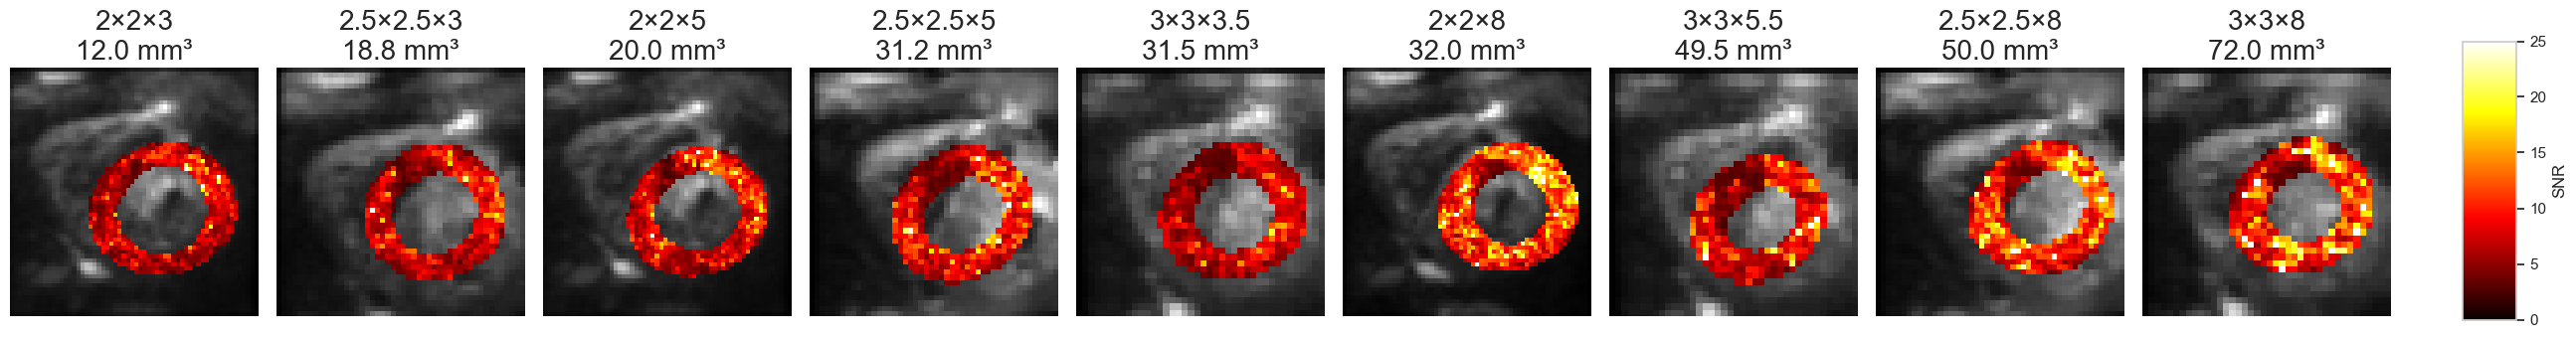

In [44]:
import matplotlib.pyplot as plt
import numpy as np

selected_volunteer = 1  # change as needed

num_vols = len(volumes)
start_idx = (selected_volunteer - 1) * num_vols
end_idx = start_idx + num_vols

b0_volunteer = b0_all[start_idx:end_idx]
snr_volunteer = snr_all[start_idx:end_idx]

voxel_dims = [
    '2×2×3', '2×2×5', '2×2×8',
    '2.5×2.5×3', '2.5×2.5×5', '2.5×2.5×8',
    '3×3×3.5', '3×3×5.5', '3×3×8'
]

sorted_indices = np.argsort(volumes)
volumes_sorted = np.array(volumes)[sorted_indices]
b0_volunteer_sorted = [b0_volunteer[i] for i in sorted_indices]
snr_volunteer_sorted = [snr_volunteer[i] for i in sorted_indices]
voxel_dims_sorted = [voxel_dims[i] for i in sorted_indices]

fig, axes = plt.subplots(1, num_vols, figsize=(3 * num_vols, 4))

for i in range(num_vols):
    ax = axes[i]
    ax.imshow(b0_volunteer_sorted[i], cmap='gray')
    im = ax.imshow(snr_volunteer_sorted[i], cmap='hot', alpha=1, vmin=0, vmax=25)
    # Title with dimension first line, volume second line
    ax.set_title(f'{voxel_dims_sorted[i]}\n{volumes_sorted[i]:.1f} mm³', fontsize=20)
    ax.axis('off')

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label='SNR')

#plt.suptitle(f'Volunteer {selected_volunteer}: B0 (gray) with SNR (hot overlay) by Volume', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()